Fit a logistic regression model to classify neural events using the fourier data from eeg signals

In [1]:
import numpy as np
import pandas as pd
import sklearn.datasets as skdata
import sklearn.metrics as skmetrics
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression

In [4]:
TRAIN_PATH = "reformatted_train_1000_samples.csv"

data = pd.read_csv(TRAIN_PATH)

data_np = data.to_numpy()

print(data_np)
print(data_np.shape)

[[738.8546142578125 246329.7402153015 11714.3768138004 ...
  3.0611410234348995 -2.5693580435581387 'Seizure']
 [648.3771362304688 240241.1200637817 12171.878323583564 ...
  -2.342824804504037 0.4739627533553749 'Seizure']
 [769.19580078125 227788.66004180908 6897.6782303575455 ...
  2.622234716289113 -1.0056941785956095 'Seizure']
 ...
 [546.8899536132812 1271.4500059280545 2106.694742316636 ...
  -0.6047417775031619 2.3821534247789025 'GPD']
 [536.5107421875 4249.36002131924 1441.466645578835 ... 1.405599961234897
  -0.8519872328177392 'GPD']
 [970.7913818359376 9242.559974165632 8429.49405913857 ...
  -0.5241702589683626 -2.55045881806235 'GPD']]
(993, 821)


In [8]:
x = data_np[:, 0:820]
y = data_np[:, 820]

# Shuffle the dataset based on sample indices
shuffled_indices = np.random.permutation(x.shape[0])

# Choose the first 80% as training set, next 10% as validation and the rest as testing
train_split_idx = int(0.80 * x.shape[0])
val_split_idx = int(0.90 * x.shape[0])

train_indices = shuffled_indices[0:train_split_idx]
val_indices = shuffled_indices[train_split_idx:val_split_idx]
test_indices = shuffled_indices[val_split_idx:]

# Select the examples from x and y to construct our training, validation, testing sets
x_train, y_train = x[train_indices, :], y[train_indices]
x_val, y_val = x[val_indices, :], y[val_indices]
x_test, y_test = x[test_indices, :], y[test_indices]

In [9]:
# Create the model
model_scikit = LogisticRegression()

# Train
model_scikit.fit(x_train, y_train)
predictions_train = model_scikit.predict(x_train)
score_train = model_scikit.score(x_train, y_train)
print('Training Accuracy: {:.4f}'.format(score_train))

# Validate
predictions_val = model_scikit.predict(x_val)
score_val = model_scikit.score(x_val, y_val)
print('Validation Accuracy: {:.4f}'.format(score_val))

# Test
predictions_test = model_scikit.predict(x_test)
score_test = model_scikit.score(x_test, y_test)
print('Test Accuracy: {:.4f}'.format(score_test))

Training Accuracy: 0.7469
Validation Accuracy: 0.7475
Test Accuracy: 0.7500


c:\Users\brenn\anaconda3\envs\ml_new\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [10]:
# Test out a number of models
models = []
val_scores = []
solvers = ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']  
num_iterations = [100, 150, 200, 500]

for solver in solvers:

    for iter in num_iterations:

        model = LogisticRegression(solver=solver, max_iter = iter)

        model.fit(x_train, y_train)

        models.append(model)

        predictions_train = model.predict(x_train)
        score_train = model.score(x_train, y_train)

        predictions_val = model.predict(x_val)
        score_val = model.score(x_val, y_val)

        val_scores.append(score_val)

        print('Solver: {}, Iterations: {}'.format(solver, iter))
        print('Training accuracy: {:0.5f}  Validation accuracy: {:0.2f}%'.format(score_train*100, score_val*100))

# Choose the best model based on highest validation accuracy
print(val_scores)
best_model_idx = np.argmax(val_scores)
best_model = models[best_model_idx]


# Sanity check
print('Best solver: {}'.format(solvers[best_model_idx // 3]))
print('Best num iterations: {}'.format(num_iterations[best_model_idx % 3]))

# Best solver on the test set
predictions_test = best_model.predict(x_test)
score_test = best_model.score(x_test, y_test)

print("The test results.... {:0.2f}%".format(score_test*100))

c:\Users\brenn\anaconda3\envs\ml_new\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Solver: liblinear, Iterations: 100
Training accuracy: 67.50630  Validation accuracy: 66.67%


c:\Users\brenn\anaconda3\envs\ml_new\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Solver: liblinear, Iterations: 150
Training accuracy: 67.50630  Validation accuracy: 66.67%
Solver: liblinear, Iterations: 200
Training accuracy: 67.50630  Validation accuracy: 66.67%
Solver: liblinear, Iterations: 500
Training accuracy: 67.50630  Validation accuracy: 66.67%


c:\Users\brenn\anaconda3\envs\ml_new\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


Solver: newton-cg, Iterations: 100
Training accuracy: 98.99244  Validation accuracy: 89.90%


c:\Users\brenn\anaconda3\envs\ml_new\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


Solver: newton-cg, Iterations: 150
Training accuracy: 100.00000  Validation accuracy: 86.87%


c:\Users\brenn\anaconda3\envs\ml_new\lib\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\brenn\anaconda3\envs\ml_new\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


Solver: newton-cg, Iterations: 200
Training accuracy: 100.00000  Validation accuracy: 86.87%


c:\Users\brenn\anaconda3\envs\ml_new\lib\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\brenn\anaconda3\envs\ml_new\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


Solver: newton-cg, Iterations: 500
Training accuracy: 100.00000  Validation accuracy: 86.87%


c:\Users\brenn\anaconda3\envs\ml_new\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Solver: lbfgs, Iterations: 100
Training accuracy: 74.68514  Validation accuracy: 74.75%


c:\Users\brenn\anaconda3\envs\ml_new\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Solver: lbfgs, Iterations: 150
Training accuracy: 74.68514  Validation accuracy: 74.75%


c:\Users\brenn\anaconda3\envs\ml_new\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Solver: lbfgs, Iterations: 200
Training accuracy: 74.68514  Validation accuracy: 74.75%


c:\Users\brenn\anaconda3\envs\ml_new\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Solver: lbfgs, Iterations: 500
Training accuracy: 74.68514  Validation accuracy: 74.75%


c:\Users\brenn\anaconda3\envs\ml_new\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Solver: sag, Iterations: 100
Training accuracy: 60.45340  Validation accuracy: 54.55%


c:\Users\brenn\anaconda3\envs\ml_new\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Solver: sag, Iterations: 150
Training accuracy: 60.07557  Validation accuracy: 53.54%


c:\Users\brenn\anaconda3\envs\ml_new\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Solver: sag, Iterations: 200
Training accuracy: 60.57935  Validation accuracy: 53.54%


c:\Users\brenn\anaconda3\envs\ml_new\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Solver: sag, Iterations: 500
Training accuracy: 61.71285  Validation accuracy: 56.57%


c:\Users\brenn\anaconda3\envs\ml_new\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Solver: saga, Iterations: 100
Training accuracy: 59.44584  Validation accuracy: 54.55%


c:\Users\brenn\anaconda3\envs\ml_new\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Solver: saga, Iterations: 150
Training accuracy: 60.07557  Validation accuracy: 54.55%


c:\Users\brenn\anaconda3\envs\ml_new\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Solver: saga, Iterations: 200
Training accuracy: 60.32746  Validation accuracy: 54.55%
Solver: saga, Iterations: 500
Training accuracy: 61.58690  Validation accuracy: 55.56%
[0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.898989898989899, 0.8686868686868687, 0.8686868686868687, 0.8686868686868687, 0.7474747474747475, 0.7474747474747475, 0.7474747474747475, 0.7474747474747475, 0.5454545454545454, 0.5353535353535354, 0.5353535353535354, 0.5656565656565656, 0.5454545454545454, 0.5454545454545454, 0.5454545454545454, 0.5555555555555556]
Best solver: newton-cg
Best num iterations: 150
The test results.... 92.00%


c:\Users\brenn\anaconda3\envs\ml_new\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Text(0.5, 1.0, 'Accuracy Score: 0.92')

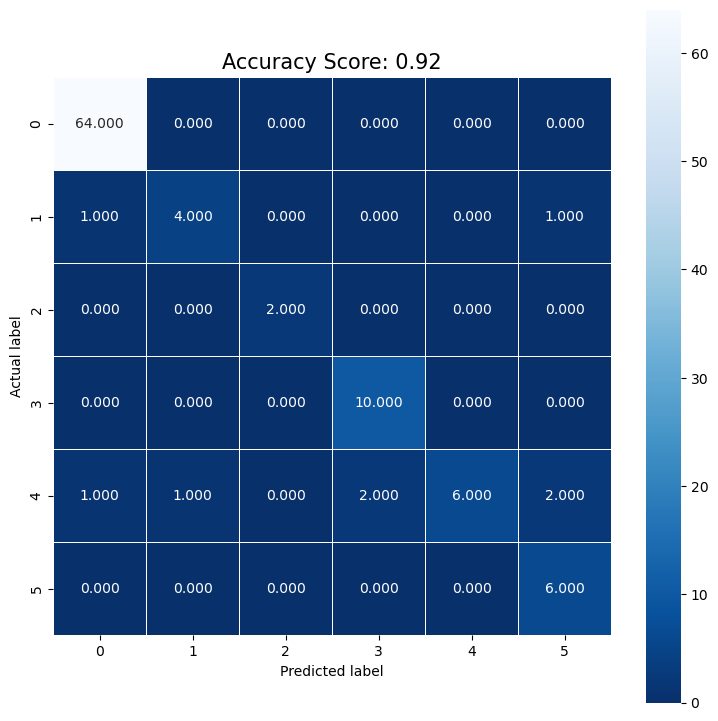

In [11]:
cm = skmetrics.confusion_matrix(y_test, predictions_test)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score_test)
plt.title(all_sample_title, size = 15)

In [12]:
kullback_leibler_train = skmetrics.mutual_info_score(y_train, predictions_train)
kullback_leibler_test = skmetrics.mutual_info_score(y_test, predictions_test)

print(kullback_leibler_train)
print(kullback_leibler_test)

0.3029377298311304
0.9272075026218771


In [14]:
TRAIN_PATH = "reformatted_train_10000_samples.csv"

data = pd.read_csv(TRAIN_PATH)

data_np = data.to_numpy()

print(data_np)
print(data_np.shape)

[[738.8546142578125 246329.7402153015 11714.3768138004 ...
  3.0611410234348995 -2.5693580435581387 'Seizure']
 [648.3771362304688 240241.1200637817 12171.878323583564 ...
  -2.342824804504037 0.4739627533553749 'Seizure']
 [769.19580078125 227788.66004180908 6897.6782303575455 ...
  2.622234716289113 -1.0056941785956095 'Seizure']
 ...
 [870280.75 861533.3392556906 938695.2833811532 ... -1.4578634583928702
  0.1908804052744606 'Seizure']
 [1292291.125 418553.7506997585 1193493.170219273 ... -0.5361902336103771
  -2.154254042385777 'Seizure']
 [321245.4375 136293.85995966196 341798.2560605431 ...
  -0.7619536443190358 -1.616435278667056 'Seizure']]
(9935, 821)


In [15]:
x = data_np[:, 0:820]
y = data_np[:, 820]

# Shuffle the dataset based on sample indices
shuffled_indices = np.random.permutation(x.shape[0])

# Choose the first 80% as training set, next 10% as validation and the rest as testing
train_split_idx = int(0.80 * x.shape[0])
val_split_idx = int(0.90 * x.shape[0])

train_indices = shuffled_indices[0:train_split_idx]
val_indices = shuffled_indices[train_split_idx:val_split_idx]
test_indices = shuffled_indices[val_split_idx:]

# Select the examples from x and y to construct our training, validation, testing sets
x_train, y_train = x[train_indices, :], y[train_indices]
x_val, y_val = x[val_indices, :], y[val_indices]
x_test, y_test = x[test_indices, :], y[test_indices]

In [18]:
# Rerun on the optimal dataset
max_iter = 150
solver = 'newton-cg'

model = LogisticRegression(solver=solver, max_iter=max_iter) 

model.fit(x_train, y_train)

predictions_train = model.predict(x_train)
score_train = model.score(x_train, y_train)

predictions_val = model.predict(x_val)
score_val = model.score(x_val, y_val)

predictions_test = model.predict(x_test)
score_test = model.score(x_test, y_test)

print('Solver: {}, Iterations: {}'.format(solver, max_iter))
print('Training accuracy: {:0.2f}%\nValidation accuracy: {:0.2f}%\nTest accuracy: {:0.2f}%'.format(score_train*100, score_val*100, score_test*100))

c:\Users\brenn\anaconda3\envs\ml_new\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


Solver: newton-cg, Iterations: 150
Training accuracy: 59.46%
Validation accuracy: 54.38%\Test accuracy: 54.33%


In [19]:
kullback_leibler_train = skmetrics.mutual_info_score(y_train, predictions_train)
kullback_leibler_test = skmetrics.mutual_info_score(y_test, predictions_test)

print(kullback_leibler_train)
print(kullback_leibler_test)

0.49561234380388647
0.4072556349567824
